In [37]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('jigsaw-toxic-comment-train-google-ru-cleaned.csv')

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())


Первые 5 строк данных:
   Unnamed: 0.1  Unnamed: 0                id  \
0             0           0  000103f0d9cfb60f   
1             1           1  00025465d4725e87   
2             2           2  0009801bd85e5806   
3             3           3  00070ef96486d6f9   
4             4           4  0007e25b2121310b   

                                        comment_text  toxic  severe_toxic  \
0  D'Оо! Он соответствует этому цвету фона, с кот...      0             0   
1  "\n\nПоздравляю и меня, хорошо использую инстр...      0             0   
2  Смысл Mitsurugi не имеет смысла - почему бы не...      0             0   
3  О, и девушка выше начала свои споры со мной. О...      0             0   
4  До свидания!\nНе смотри, приходи или думай о в...      1             0   

   obscene  threat  insult  identity_hate  
0        0       0       0              0  
1        0       0       0              0  
2        0       0       0              0  
3        0       0       0              0  

In [38]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())

Первые 5 строк данных:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...      0   
1  00025465d4725e87  "\n\nПоздравляю и меня, хорошо использую инстр...      0   
2  0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не...      0   
3  00070ef96486d6f9  О, и девушка выше начала свои споры со мной. О...      0   
4  0007e25b2121310b  До свидания!\nНе смотри, приходи или думай о в...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Размерность данных (строки, столбцы):
(223147, 8)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223147 entries, 0 t

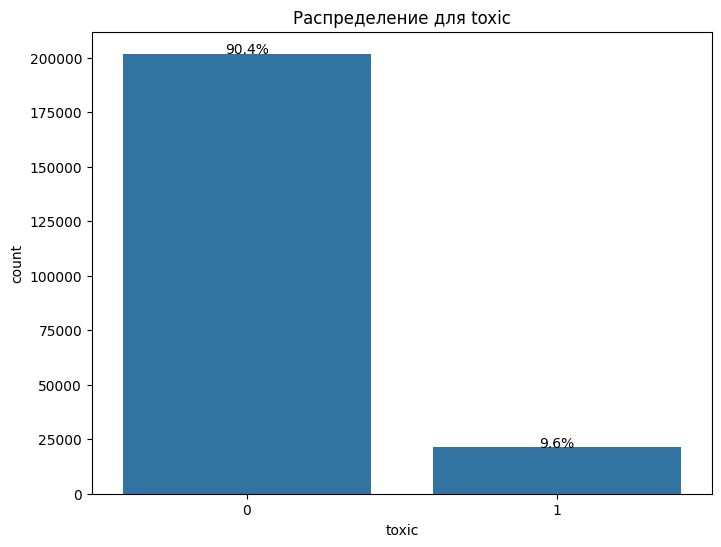

Распределение для toxic:
toxic
0    90.426938
1     9.573062
Name: proportion, dtype: float64


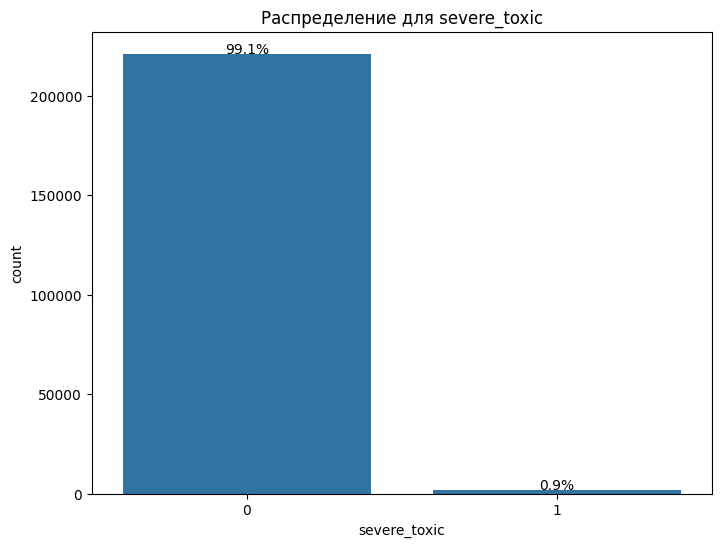

Распределение для severe_toxic:
severe_toxic
0    99.121655
1     0.878345
Name: proportion, dtype: float64


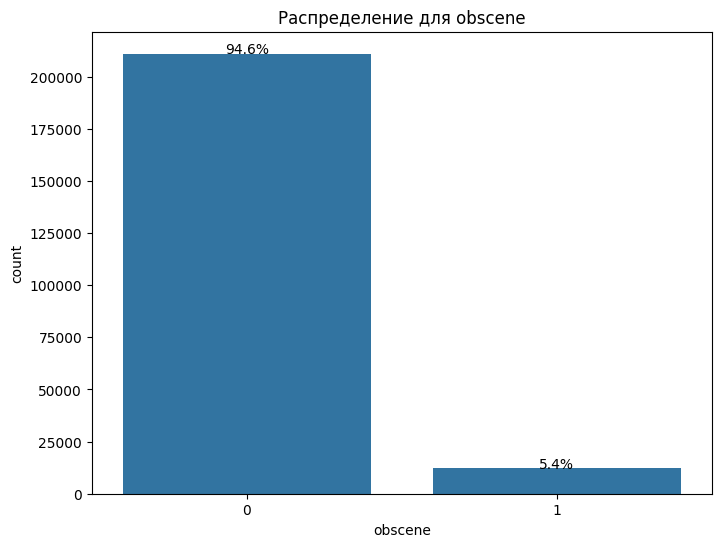

Распределение для obscene:
obscene
0    94.568155
1     5.431845
Name: proportion, dtype: float64


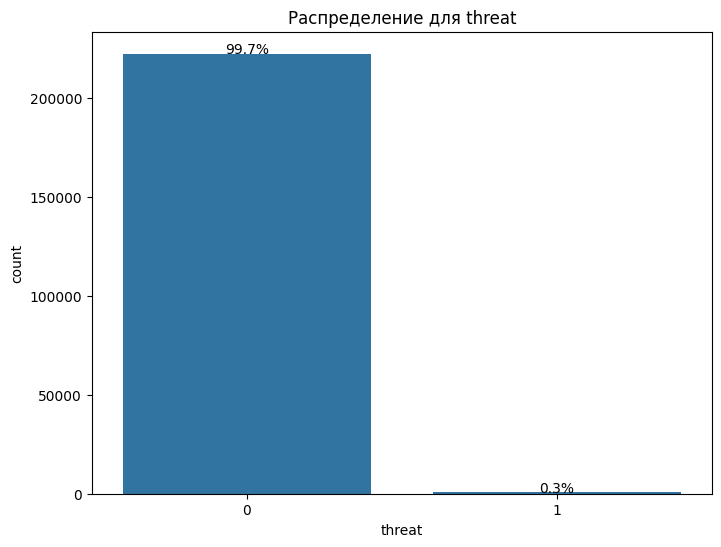

Распределение для threat:
threat
0    99.692579
1     0.307421
Name: proportion, dtype: float64


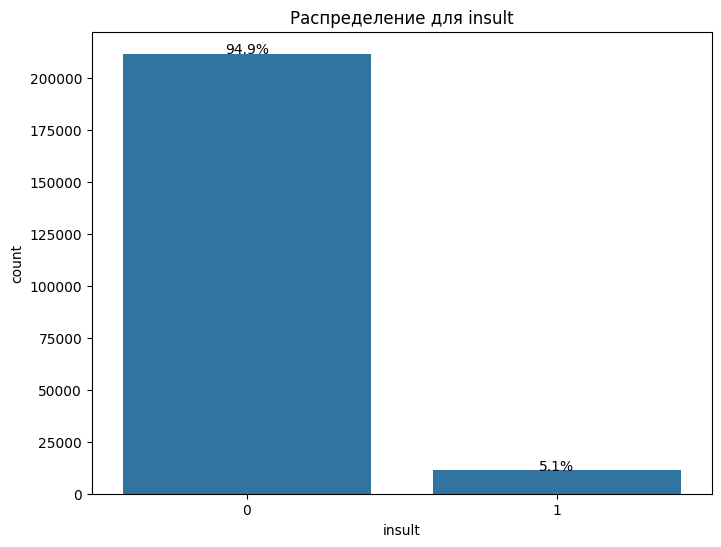

Распределение для insult:
insult
0    94.943244
1     5.056756
Name: proportion, dtype: float64


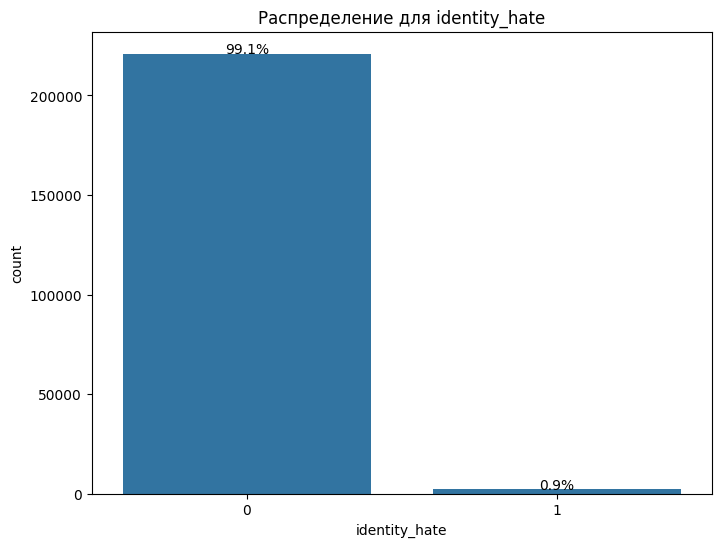

Распределение для identity_hate:
identity_hate
0    99.052194
1     0.947806
Name: proportion, dtype: float64


In [20]:
# Проверьте, есть ли дисбаланс классов (например, если 95% комментариев нетоксичные, а 5% токсичные).
import matplotlib.pyplot as plt
import seaborn as sns

# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Построение графиков для каждой метки
for label in labels:
    # Подсчет количества значений для каждого класса
    counts = df[label].value_counts()
    
    # Расчет процентного соотношения
    percentages = df[label].value_counts(normalize=True) * 100
    
    # Построение countplot
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=label, data=df)
    plt.title(f'Распределение для {label}')
    
    # Добавление процентных значений на график
    for p in ax.patches:
        height = p.get_height()
        # Преобразуем p.get_x() в целое число (0 или 1)
        class_index = int(p.get_x() + p.get_width() / 2)
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Позиция по X
            height + 0.1,                    # Позиция по Y (немного выше столбца)
            f'{percentages[class_index]:.1f}%',  # Текст с процентом
            ha='center'                      # Выравнивание по центру
        )
    
    plt.show()
    
    # Вывод процентного соотношения в консоль
    print(f"Распределение для {label}:")
    print(percentages)

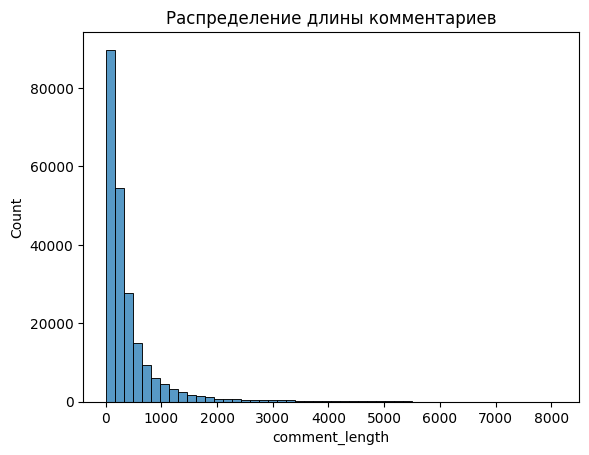

In [6]:
# Изучите длину комментариев

df['comment_length'] = df['comment_text'].apply(len)
sns.histplot(df['comment_length'], bins=50)
plt.title('Распределение длины комментариев')
plt.show()

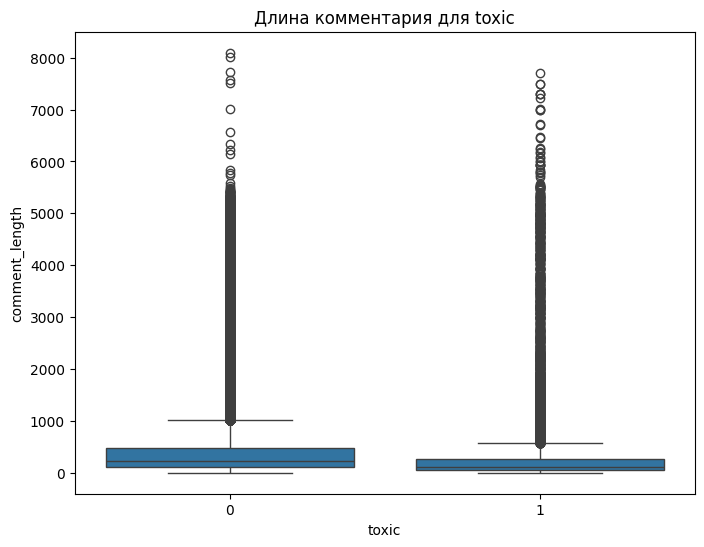

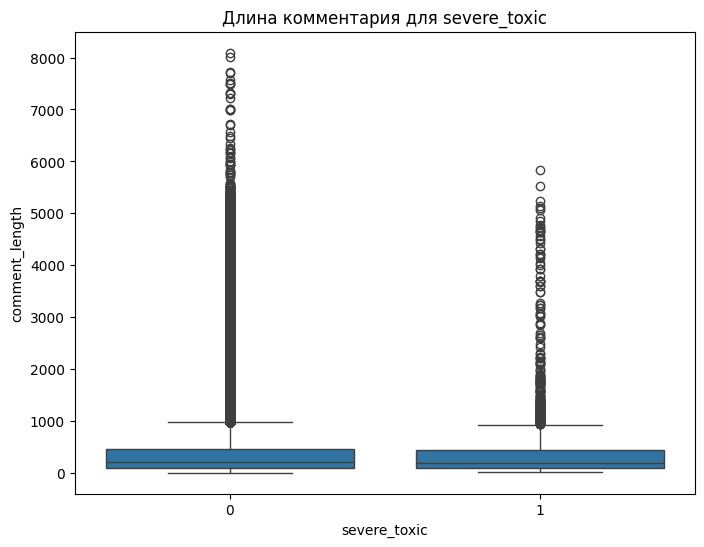

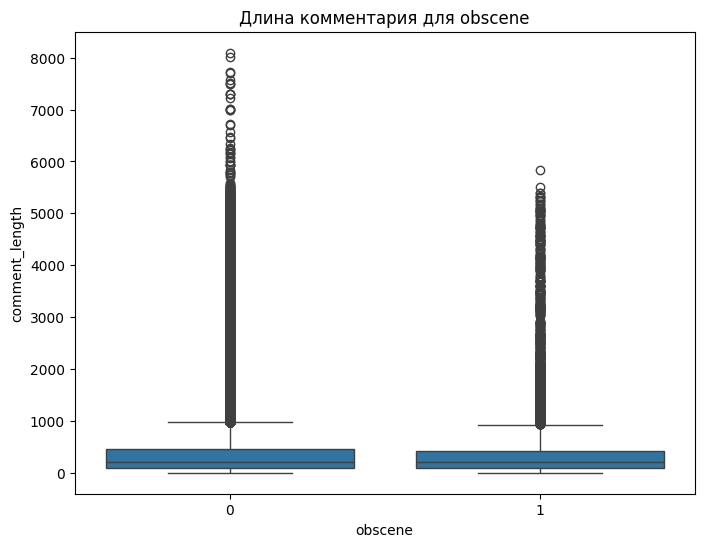

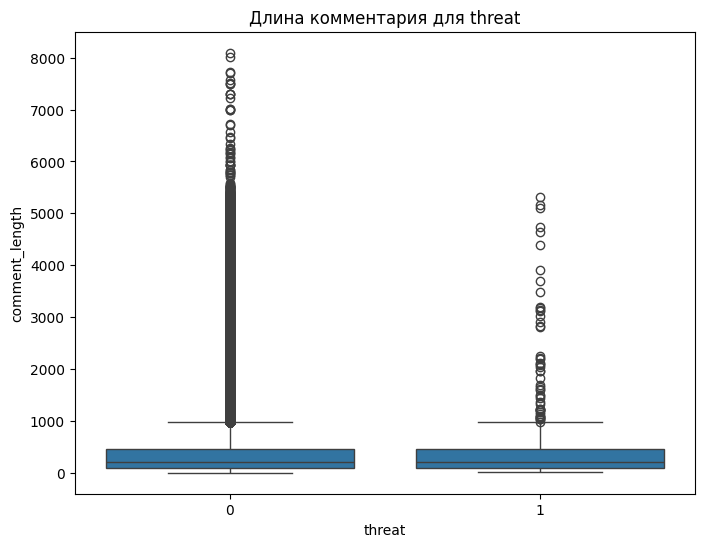

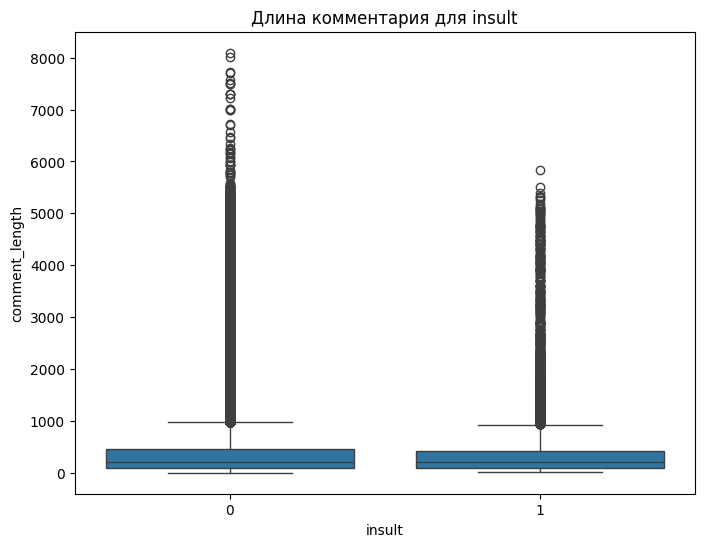

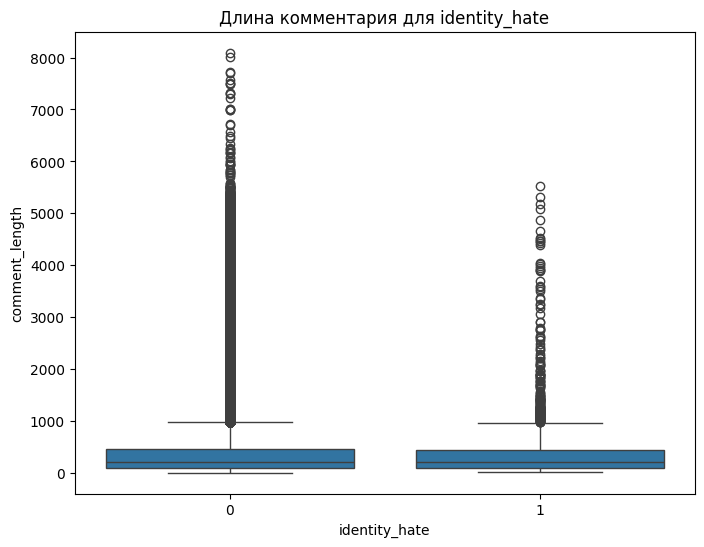

In [9]:
# Добавляем столбец с длиной комментария
df['comment_length'] = df['comment_text'].apply(len)

# Проверка корреляции между длиной комментария и метками
for label in labels:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=label, y='comment_length', data=df)
    plt.title(f'Длина комментария для {label}')
    plt.show()

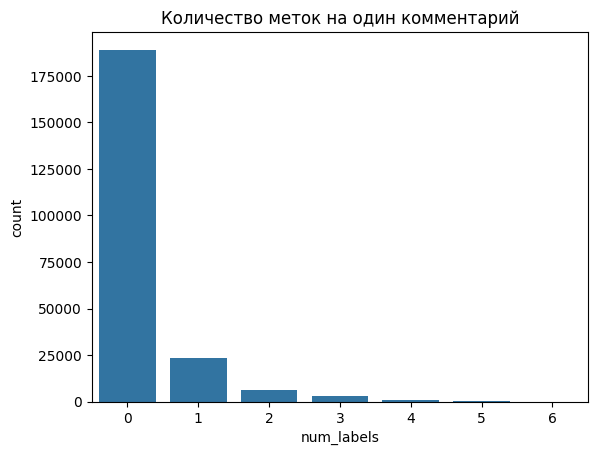

In [7]:
# Обратите внимание, что комментарий может быть одновременно помечен несколькими метками (например, toxic и obscene).
df['num_labels'] = df[labels].sum(axis=1)
sns.countplot(x='num_labels', data=df)
plt.title('Количество меток на один комментарий')
plt.show()

Распределение для любого типа токсичности (any_toxic):
any_toxic
0    0.847656
1    0.152344
Name: proportion, dtype: float64


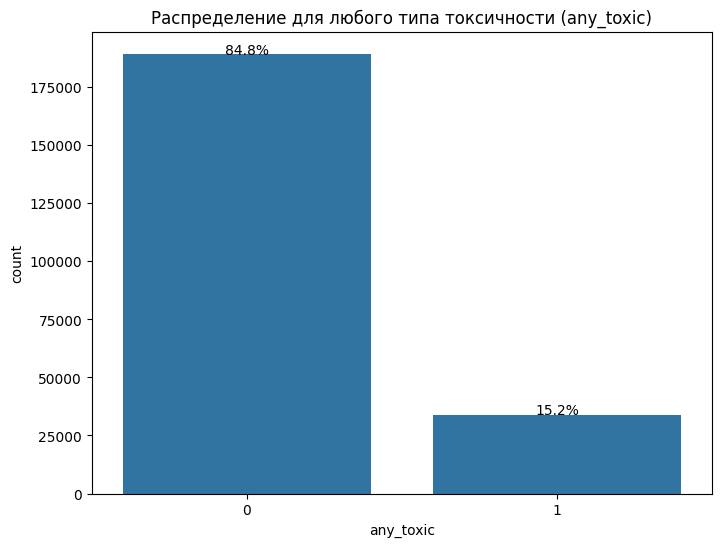

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем новый столбец, который указывает, является ли комментарий токсичным (хотя бы одна метка = 1)
df['any_toxic'] = df[labels].max(axis=1)

# Распределение для суммарного столбца
print("Распределение для любого типа токсичности (any_toxic):")
print(df['any_toxic'].value_counts(normalize=True))  # Процентное соотношение

# Визуализация с процентами на столбиках
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='any_toxic', data=df)
plt.title('Распределение для любого типа токсичности (any_toxic)')

# Добавление процентных значений на столбики
for p in ax.patches:
    height = p.get_height()  # Высота столбика
    percentage = (height / len(df)) * 100  # Процентное соотношение
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Позиция по X (центр столбика)
        height + 0.1,                    # Позиция по Y (немного выше столбика)
        f'{percentage:.1f}%',            # Текст с процентом
        ha='center'                      # Выравнивание по центру
    )

plt.show()

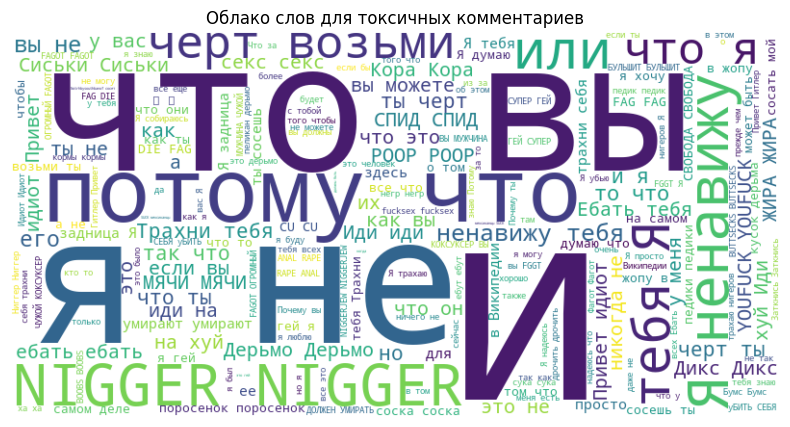

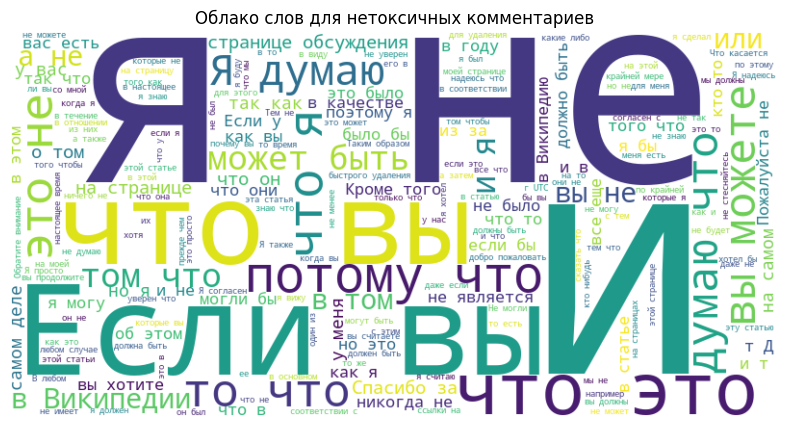

In [10]:
from wordcloud import WordCloud

# Функция для построения облака слов
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Тексты для токсичных и нетоксичных комментариев
toxic_text = ' '.join(df[df['toxic'] == 1]['comment_text'])
non_toxic_text = ' '.join(df[df['toxic'] == 0]['comment_text'])

# Облако слов для токсичных комментариев
generate_wordcloud(toxic_text, 'Облако слов для токсичных комментариев')

# Облако слов для нетоксичных комментариев
generate_wordcloud(non_toxic_text, 'Облако слов для нетоксичных комментариев')

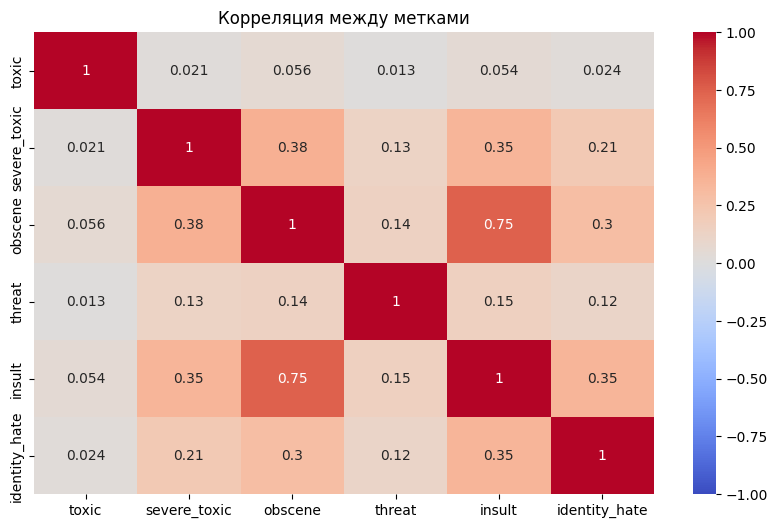

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Тепловая карта корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(df[labels].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между метками')
plt.show()

C:\Users\bokar\AppData\Local\Temp\ipykernel_11008\1682982868.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_percentages.index, y=label_percentages.values, palette='viridis')


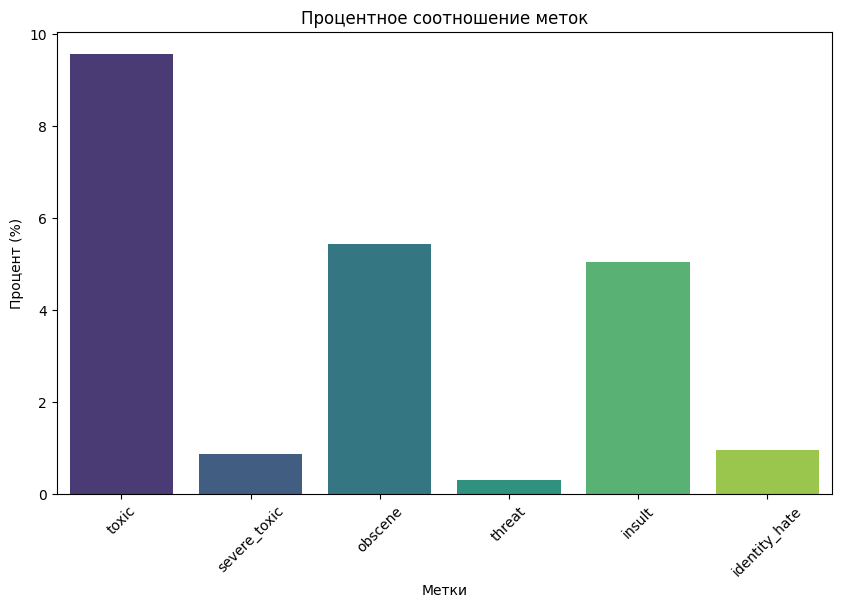

toxic            9.573062
severe_toxic     0.878345
obscene          5.431845
threat           0.307421
insult           5.056756
identity_hate    0.947806
dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Расчет процентного соотношения для каждой метки
label_percentages = df[labels].mean() * 100

# Визуализация в виде bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_percentages.index, y=label_percentages.values, palette='viridis')
plt.title('Процентное соотношение меток')
plt.ylabel('Процент (%)')
plt.xlabel('Метки')
plt.xticks(rotation=45)
plt.show()

# Вывод процентного соотношения
print(label_percentages)

C:\Users\bokar\AppData\Local\Temp\ipykernel_11008\1459670925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


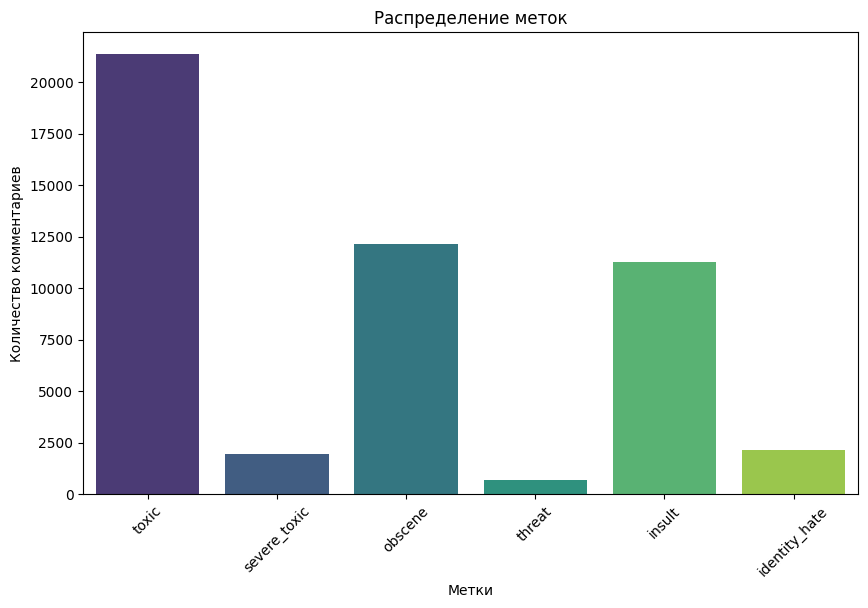

toxic            21362
severe_toxic      1960
obscene          12121
threat             686
insult           11284
identity_hate     2115
dtype: int64


In [13]:
# Подсчет количества комментариев для каждой метки
label_counts = df[labels].sum()

# Визуализация в виде bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Распределение меток')
plt.ylabel('Количество комментариев')
plt.xlabel('Метки')
plt.xticks(rotation=45)
plt.show()

# Вывод количества комментариев для каждой метки
print(label_counts)

In [39]:
import string
import pandas as pd
from natasha import MorphVocab, Doc, Segmenter, NewsMorphTagger, NewsEmbedding

# Загрузка стоп-слов для русского языка (используем NLTK)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Инициализация компонентов Natasha
segmenter = Segmenter()  # Для токенизации и сегментации текста
emb = NewsEmbedding()  # Загрузка модели для морфологического анализа
morph_tagger = NewsMorphTagger(emb)  # Для морфологического анализа
morph_vocab = MorphVocab()  # Для лемматизации

# Функция для предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Удаление пунктуации
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Удаление стоп-слов
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Лемматизация с использованием Natasha
    doc = Doc(text)
    doc.segment(segmenter)  # Токенизация
    doc.tag_morph(morph_tagger)  # Морфологический анализ
    
    # Извлечение лемм
    for token in doc.tokens:
        token.lemmatize(morph_vocab)  # Лемматизация каждого токена
    lemmas = [token.lemma for token in doc.tokens]
    text = ' '.join(lemmas)
    
    return text

# Загрузка ваших данных
# Предположим, что данные уже загружены в DataFrame df
# Если данные в CSV, используйте:
# df = pd.read_csv('your_data.csv')

# Применение функции к столбцу с комментариями
df['comment_text_cleaned'] = df['comment_text'].apply(preprocess_text)

# Просмотр результата
print(df[['comment_text', 'comment_text_cleaned']].head())

# Удаление ненужных столбцов, если они есть
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, errors='ignore')

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bokar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        comment_text  \
0  D'Оо! Он соответствует этому цвету фона, с кот...   
1  "\n\nПоздравляю и меня, хорошо использую инстр...   
2  Смысл Mitsurugi не имеет смысла - почему бы не...   
3  О, и девушка выше начала свои споры со мной. О...   
4  До свидания!\nНе смотри, приходи или думай о в...   

                                comment_text_cleaned  
0  d оо соответствовать этот цвет фон который пох...  
1  поздравлять использовать инструмент · разговар...  
2  смысл mitsurugi иметь смысл почему поспорить в...  
3  девушка выше начать свой спор я сунуть нос туд...  
4  свидание смотреть приходить думать возвращение...  
Первые 5 строк данных:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...      0   
1  00025465d4725e87  "\n\nПоздравляю и меня, хорошо использую инстр...      0   
2  0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не

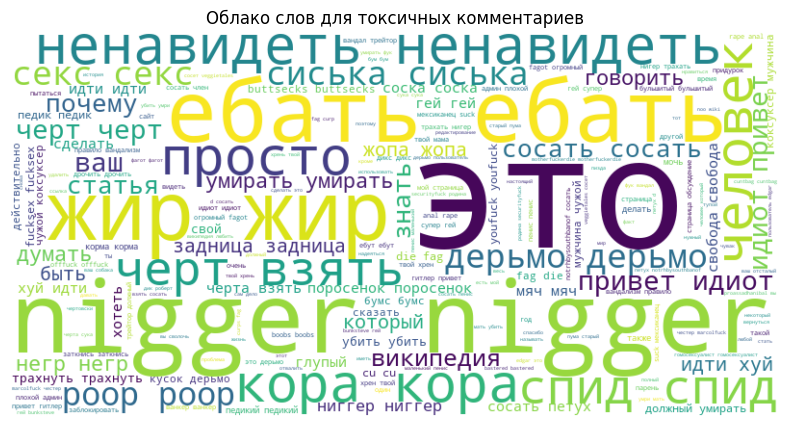

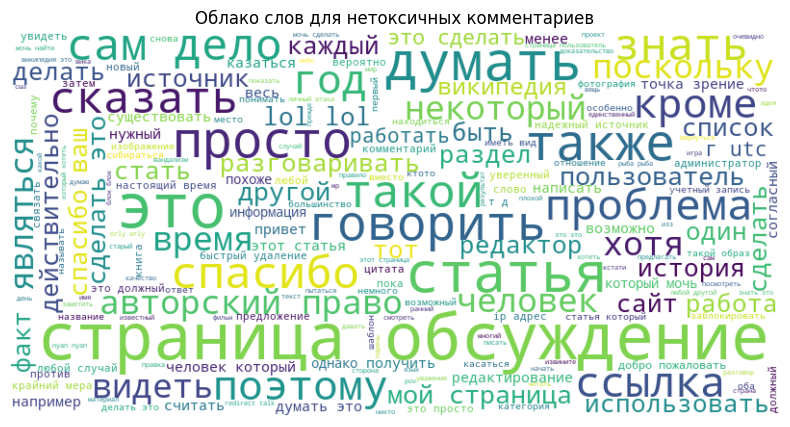

In [47]:
from wordcloud import WordCloud

# Функция для построения облака слов
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Тексты для токсичных и нетоксичных комментариев
toxic_text = ' '.join(df[df['toxic'] == 1]['comment_text_cleaned'])
non_toxic_text = ' '.join(df[df['toxic'] == 0]['comment_text_cleaned'])

# Облако слов для токсичных комментариев
generate_wordcloud(toxic_text, 'Облако слов для токсичных комментариев')

# Облако слов для нетоксичных комментариев
generate_wordcloud(non_toxic_text, 'Облако слов для нетоксичных комментариев')

In [41]:
# Проверка на дубликаты
duplicates = df[df.duplicated('comment_text', keep=False)]
print(f"Найдено дубликатов: {len(duplicates)}")

# Удаление дубликатов
df = df.drop_duplicates(subset='comment_text', keep='first')
print(f"Данные после удаления дубликатов: {len(df)} строк")

Найдено дубликатов: 421
Данные после удаления дубликатов: 222917 строк


In [42]:
# Проверка на пустые значения
empty_values = df[df['comment_text'].str.strip() == '']
print(f"Найдено пустых строк: {len(empty_values)}")

# Удаление пустых строк
df = df[df['comment_text'].str.strip() != '']
print(f"Данные после удаления пустых строк: {len(df)} строк")

Найдено пустых строк: 0
Данные после удаления пустых строк: 222917 строк


In [44]:
import re

# Функция для проверки, состоит ли текст только из спецсимволов или цифр
def is_special_or_numeric(text):
    # Регулярное выражение для поиска символов, не являющихся буквами
    return bool(re.match(r'^[\W\d_]+$', text))

# Находим комментарии, состоящие только из спецсимволов или цифр
special_or_numeric_comments = df[df['comment_text'].apply(is_special_or_numeric)]

# Выводим первые 5 строк для удаления
print("\nПервые 5 комментариев для удаления (только спецсимволы/цифры):")
print(special_or_numeric_comments.head())

# Удаляем такие комментарии
df = df[~df['comment_text'].apply(is_special_or_numeric)]
print(f"Данные после удаления комментариев с спецсимволами/цифрами: {len(df)} строк")


Первые 5 комментариев для удаления (только спецсимволы/цифры):
Empty DataFrame
Columns: [id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate, comment_text_cleaned]
Index: []
Данные после удаления комментариев с спецсимволами/цифрами: 222883 строк


In [46]:
import re

# Функция для удаления некорректных символов из текста
def remove_invalid_chars(text):
    # Регулярное выражение для поиска и удаления некорректных символов
    return re.sub(r'[^\x00-\x7Fа-яА-ЯёЁ]', '', text)

# Применяем функцию к столбцу comment_text
df['comment_text'] = df['comment_text'].apply(remove_invalid_chars)

# Проверяем результат
print("Первые 5 строк после очистки от некорректных символов:")
print(df.head())

Первые 5 строк после очистки от некорректных символов:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...      0   
2  0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не...      0   
3  00070ef96486d6f9  О, и девушка выше начала свои споры со мной. О...      0   
4  0007e25b2121310b  До свидания!\nНе смотри, приходи или думай о в...      1   
6  0001d958c54c6e35  Вы, сэр, мой герой. Есть ли шанс, что вы помни...      0   

   severe_toxic  obscene  threat  insult  identity_hate  \
0             0        0       0       0              0   
2             0        0       0       0              0   
3             0        0       0       0              0   
4             0        0       0       0              0   
6             1        1       0       1              0   

                                comment_text_cleaned  
0  d оо соответствовать этот цвет фон который по